In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test=pd.read_csv('test.csv')

In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
x=df_train.drop(['label'],axis=1)
y=df_train['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [10]:
lr.fit(x_train,y_train)

C:\Users\athar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred=lr.predict(x_test)

In [12]:
lr.score(x_test,y_test)

0.9104832949765892

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
from sklearn.model_selection import train_test_split
x=df_train.drop(['label'],axis=1)
y=df_train['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x = np.asarray(x)
y = np.asarray(y)

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history=model.fit(x_train, y_train, validation_data = (x_test,y_test),epochs=12)

Train on 29399 samples, validate on 12601 samples
Epoch 1/12
29399/29399 [==============================] - 2s 64us/sample - loss: 0.3397 - accuracy: 0.9033 - val_loss: 0.2024 - val_accuracy: 0.9430
Epoch 2/12
29399/29399 [==============================] - 1s 51us/sample - loss: 0.1596 - accuracy: 0.9538 - val_loss: 0.1506 - val_accuracy: 0.9542
Epoch 3/12
29399/29399 [==============================] - 1s 50us/sample - loss: 0.1134 - accuracy: 0.9673 - val_loss: 0.1261 - val_accuracy: 0.9623
Epoch 4/12
29399/29399 [==============================] - 1s 48us/sample - loss: 0.0841 - accuracy: 0.9753 - val_loss: 0.1180 - val_accuracy: 0.9646
Epoch 5/12
29399/29399 [==============================] - 3s 89us/sample - loss: 0.0631 - accuracy: 0.9817 - val_loss: 0.1060 - val_accuracy: 0.9700
Epoch 6/12
29399/29399 [==============================] - 2s 65us/sample - loss: 0.0496 - accuracy: 0.9853 - val_loss: 0.1121 - val_accuracy: 0.9680
Epoch 7/12
29399/29399 [==============================] 

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose = 2)

print('\nTest accuracy:', test_acc)

12601/1 - 0s - loss: 0.0868 - accuracy: 0.9702

Test accuracy: 0.9702405


In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


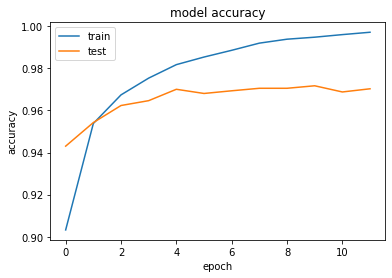

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss


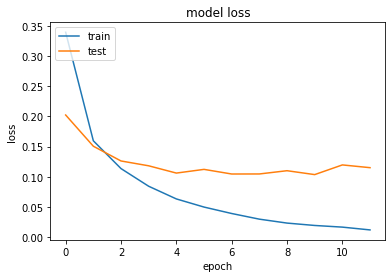

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

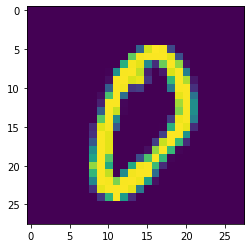

In [23]:
plt.imshow(x_train[0][:,:,0])

In [24]:
df_test=df_test/255
df_test = df_test.values.reshape(-1,28,28,1)
df_test = np.asarray(df_test)


In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(df_test)

In [27]:
predictions[0]

array([3.4126518e-11, 3.8865922e-22, 1.0000000e+00, 6.0888783e-10,
       2.5651432e-12, 2.8498652e-15, 5.3273050e-12, 3.7623337e-14,
       6.3895043e-14, 9.9714353e-15], dtype=float32)

In [28]:
np.argmax(predictions[0])

2

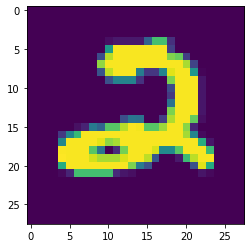

In [29]:
plt.imshow(df_test[0][:,:,0])